In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')


In [3]:
print(promise_zone.crs)

epsg:2274


In [4]:
promise_zone = promise_zone.to_crs('EPSG:4326')

In [5]:
print(promise_zone.crs)

EPSG:4326


In [6]:
type(promise_zone)

geopandas.geodataframe.GeoDataFrame

In [7]:
promise_zone.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


In [8]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')

In [9]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
bus_stops.head(3)

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


In [10]:
type(bus_stops)

pandas.core.frame.DataFrame

In [11]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = promise_zone.crs, 
                           geometry = bus_stops['geometry'])

In [12]:
promise_geo = gpd.GeoDataFrame(promise_zone,
                              crs = bus_geo.crs,
                              geometry = promise_zone['geometry'])

In [28]:
promise_stops = gpd.sjoin(bus_geo, promise_geo, op = 'within')


<AxesSubplot:>

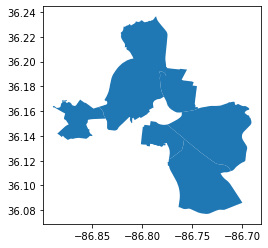

In [29]:
promise_zone.plot()

In [30]:
area_center = [36.174465, -86.767960]

In [31]:
map_nash = folium.Map(location =  area_center, zoom_start = 12)
map_nash


In [32]:
folium.GeoJson(promise_zone).add_to(map_nash)



In [33]:
marker_cluster = MarkerCluster().add_to(map_nash)

for row_index, row_values in promise_stops.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster)

In [34]:
map_nash
